In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import pickle_data
import requests
import json

In [2]:
sns.set(style='ticks', palette='muted')
sns.set_context('talk')

In [3]:
df = pickle_data.get_pickled_data('./brfss/brfss_sas.pickle')

In [4]:
def ftin_to_in(x):
    if x < 9000:
        ft = int(x / 100)
        return x % 100 + ft*12
    return x

def mcm_to_cm(x):
    if x > 9000:
        m = x % 1000
        return m / 2.54
    return x
        

In [5]:
height = df.HEIGHT3[~df.HEIGHT3.isin([9999,7777,np.NaN])]
height = height.apply(ftin_to_in)
height = height.apply(mcm_to_cm)

In [6]:
x = max(abs(min(height)), abs(max(height)))
xs = np.linspace(min(height), x)

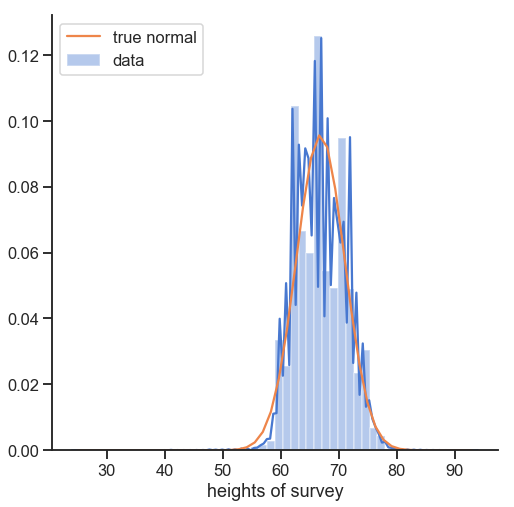

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(height, label='data')
sns.lineplot(xs, stats.norm.pdf(xs, height.mean(), height.std()),
             ci=None, label='true normal')
ax.legend(loc='upper left', frameon=True)
ax.set(xlabel='heights of survey')
sns.despine()

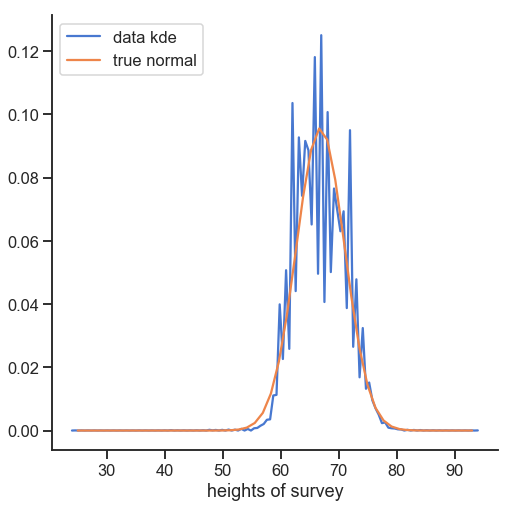

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(height, label='data kde')
sns.lineplot(xs, stats.norm.pdf(xs, height.mean(), height.std()),
             ci=None, label='true normal')
ax.legend(loc='upper left', frameon=True)
ax.set(xlabel='heights of survey')
sns.despine()

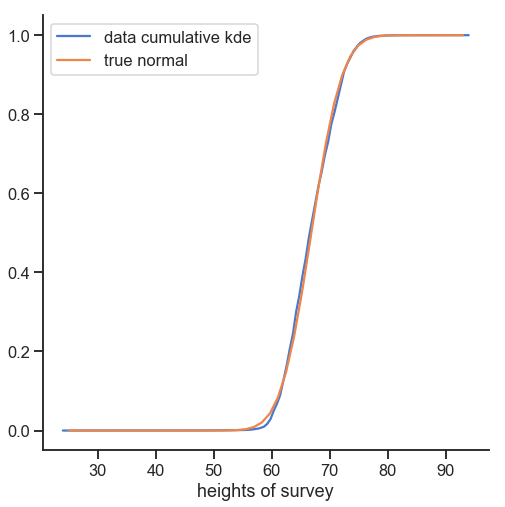

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(height, cumulative=True,
            label='data cumulative kde')
sns.lineplot(xs, stats.norm.cdf(xs, height.mean(), height.std()),
             ci=None, label='true normal')
ax.legend(loc='upper left', frameon=True)
ax.set(xlabel='heights of survey')
sns.despine()

In [10]:
height_pmf = height.value_counts().sort_index() / len(height)
height_cdf = height_pmf.cumsum()

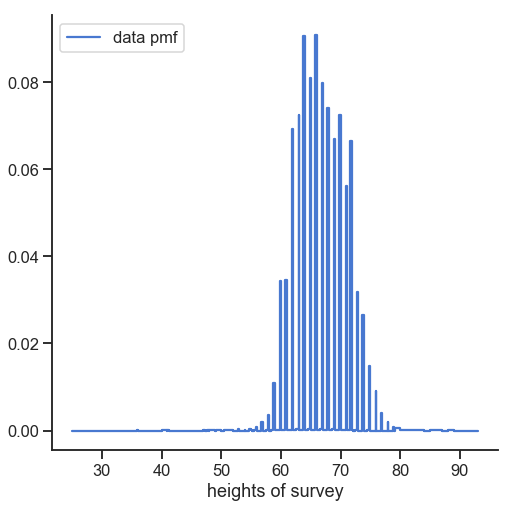

In [11]:
fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(data=height_pmf, drawstyle='steps',
             ci=None, label='data pmf')
ax.legend(loc='upper left', frameon=True)
ax.set(xlabel='heights of survey')
sns.despine()

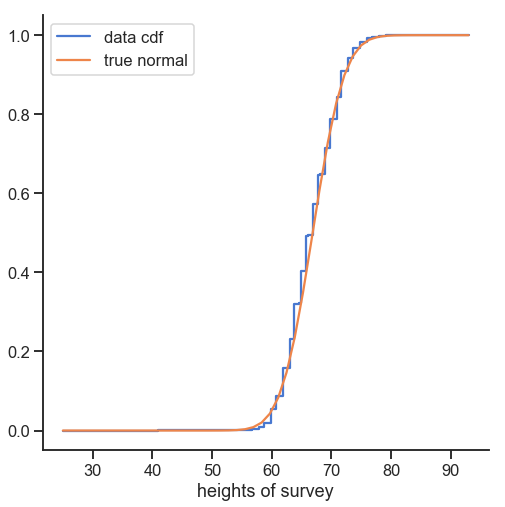

In [12]:
fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(data=height_cdf, drawstyle='steps',
             ci=None, label='data cdf')
sns.lineplot(xs, stats.norm.cdf(xs, height.mean(), height.std()),
             ci=None, label='true normal')
ax.legend(loc='upper left', frameon=True)
ax.set(xlabel='heights of survey')
sns.despine()

In [13]:
def get_expo_samples(lambda_, n):
    return [int(np.sum(stats.expon.rvs(scale=1/lambda_, size=n)))
            for _ in range(1000)]

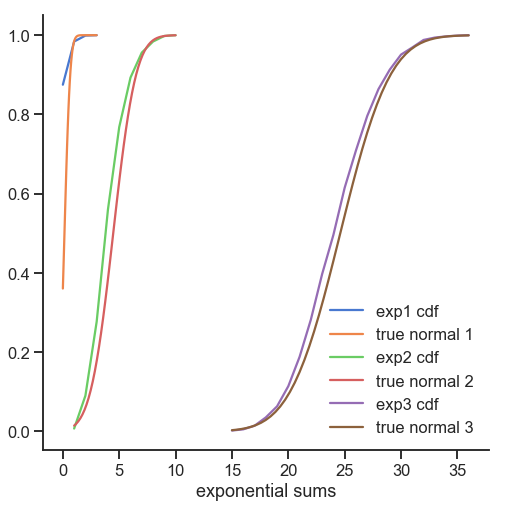

In [14]:
xp1 = pd.Series(get_expo_samples(2, 1))
xpp1 = xp1.value_counts().sort_index() / len(xp1)
xpc1 = xpp1.cumsum()
xp2 = pd.Series(get_expo_samples(2, 10))
xpp2 = xp2.value_counts().sort_index() / len(xp2)
xpc2 = xpp2.cumsum()
xp3 = pd.Series(get_expo_samples(2, 50))
xpp3 = xp3.value_counts().sort_index() / len(xp3)
xpc3 = xpp3.cumsum()

fig, ax = plt.subplots(figsize=(8,8))
xs = np.linspace(min(xp1), max(xp1))
sns.lineplot(data=xpc1, label='exp1 cdf')
sns.lineplot(xs, stats.norm.cdf(xs, xp1.mean(), xp1.std()),
             ci=None, label='true normal 1')
xs = np.linspace(min(xp2), max(xp2))
sns.lineplot(data=xpc2, label='exp2 cdf')
sns.lineplot(xs, stats.norm.cdf(xs, xp2.mean(), xp2.std()),
             ci=None, label='true normal 2')
xs = np.linspace(min(xp3), max(xp3))
sns.lineplot(data=xpc3, label='exp3 cdf')
sns.lineplot(xs, stats.norm.cdf(xs, xp3.mean(), xp3.std()),
             ci=None, label='true normal 3')
ax.legend(loc='lower right', frameon=False)
ax.set(xlabel='exponential sums')
sns.despine()

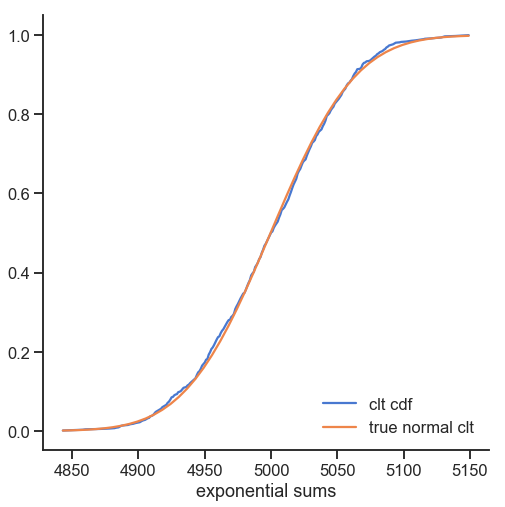

In [15]:
s = pd.Series(get_expo_samples(2, 10000))
sp = s.value_counts().sort_index() / len(s)
sc = sp.cumsum()

fig, ax = plt.subplots(figsize=(8,8))
xs = np.linspace(min(s), max(s))
sns.lineplot(data=sc, ci=None, label='clt cdf')
sns.lineplot(xs, stats.norm.cdf(xs, s.mean(), s.std()),
             ci=None, label='true normal clt')
ax.legend(loc='lower right', frameon=False)
ax.set(xlabel='exponential sums')
sns.despine()

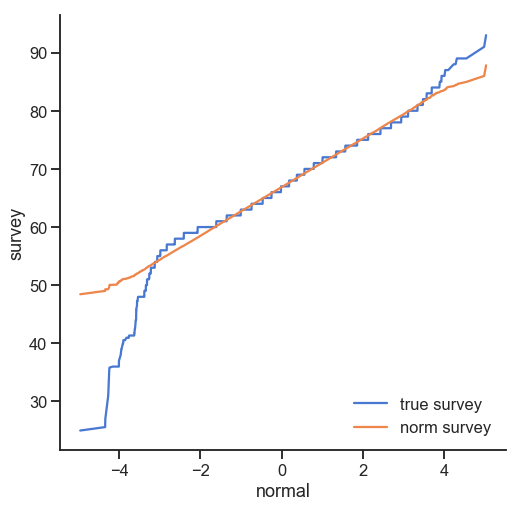

In [16]:
fig, ax = plt.subplots(figsize=(8,8))
height_sorted = height.sort_values().reset_index(drop=True)
height_normal = (pd.Series(stats.norm.rvs(
    height.mean(), height.std(), size=height.count()))
                 .sort_values().reset_index(drop=True))
normal = (pd.Series(stats.norm.rvs(size=height.count()))
          .sort_values().reset_index(drop=True))
df_true_survey = pd.DataFrame(data={'survey':height_sorted,
                                    'normal':normal})
df_norm_survey = pd.DataFrame(data={'survey':height_normal,
                                    'normal':normal})
sns.lineplot(x='normal', y='survey', data=df_true_survey,
             ci=None, label='true survey')
sns.lineplot(x='normal', y='survey', data=df_norm_survey,
             ci=None, label='norm survey')
ax.legend(loc='lower right', frameon=False)
sns.despine()